In [217]:
# Postulante: Georgina Viviana Quiroz Mendoza
# Docente: Marcelo Palma
# Modulo: BUSINESS INTELLIGENT Y MINERIA DE DATOS

# 1. Carga y exploración inicial (15 min)
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [218]:
# Cargar los datos (puedes cambiar la ruta por el nombre de tu archivo si lo estás usando desde CSV)
data = pd.read_csv("D:/MAESTRIA/MODULO 4/PRACTICA 2/transacciones.csv")

In [219]:
# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [220]:
# Agregando el nuevo archivo

# Inicializar la columna IsFraud en 0
data["Fraude"] = 0

# Regla 1: Monto alto y cliente joven en canal online
cond1 = (data["Channel"] == "Online") & (data["TransactionAmount"] < 50) & (data["CustomerAge"] < 25)

# Regla 2: Duración muy corta (<30s) o muy larga (>180s) en canal online
cond2 = (data["Channel"] == "Online") & ((data["TransactionDuration"] < 5) | (data["TransactionDuration"] > 30))

# Regla 3: IP sospechosa (comienza con 215. o 200.)
cond3 = data["IP Address"].str.startswith(("215.", "200."))

# Regla 4: Múltiples intentos de login (> 3)
cond4 = data["LoginAttempts"] > 2

# Regla 5: Múltiples intentos de login (> 3)
cond5 = (data["Channel"] == "Online") & (data["TransactionAmount"] > data["AccountBalance"])

# Combinar condiciones y asignar valor 1 si se cumple alguna
data["Fraude"] = np.where(cond1 | cond2 | cond3 | cond4 | cond5, 1, 0)
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Fraude
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


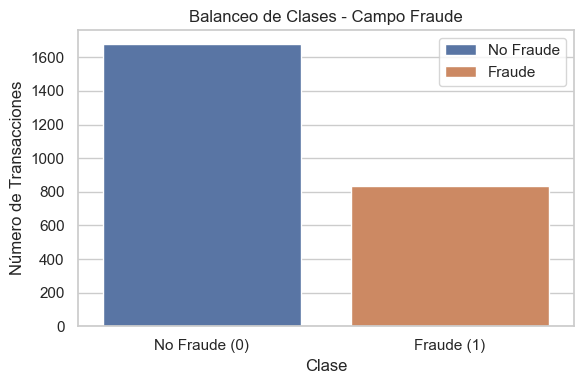

In [221]:
# Configuración de estilo
sns.set(style="whitegrid")

# Conteo de clases
fraud_counts = data["Fraude"].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=["No Fraude", "Fraude"])
plt.xticks([0, 1], ["No Fraude (0)", "Fraude (1)"])
plt.title("Balanceo de Clases - Campo Fraude")
plt.xlabel("Clase")
plt.ylabel("Número de Transacciones")
plt.tight_layout()
plt.show()

In [222]:
# 2. Explorar y limpiar los datos
# Ver información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [223]:
# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
Fraude                     0
dtype: int64


In [224]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())


Número de filas duplicadas:
0


In [225]:
# Eliminar duplicados si los hay
data = data.drop_duplicates()
print(data.dtypes)

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
Fraude                       int64
dtype: object


In [226]:
# Transformando tipos de datos
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionType'] = data['TransactionType'].astype('category')
data['Location'] = data['Location'].astype('category')
data['IP Address'] = data['IP Address'].astype('category')
data['Channel'] = data['Channel'].astype('category')
data['CustomerOccupation'] = data['CustomerOccupation'].astype('category')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])
print(data.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                         category
DeviceID                           object
IP Address                       category
MerchantID                         object
Channel                          category
CustomerAge                         int64
CustomerOccupation               category
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
Fraude                              int64
dtype: object


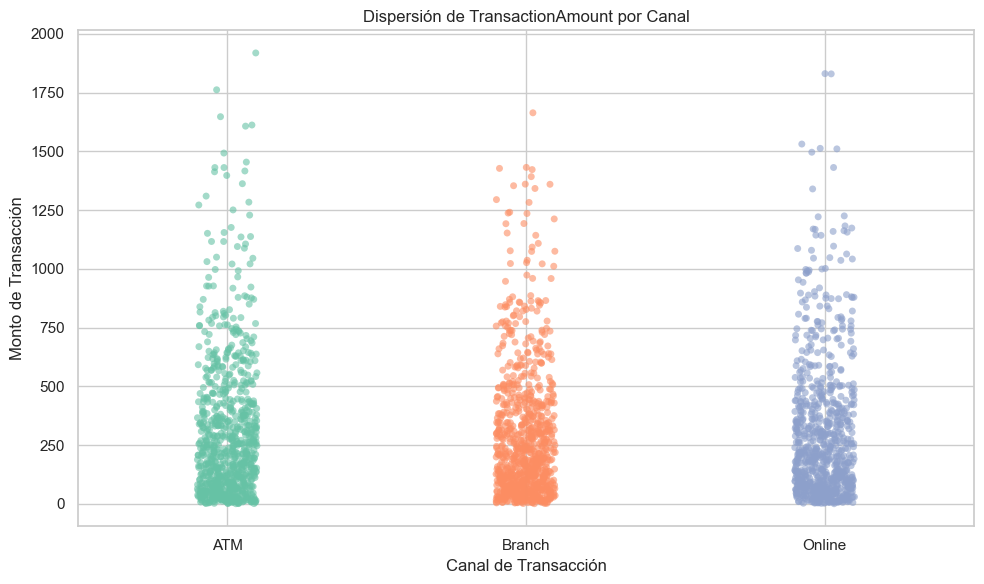

In [227]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='TransactionAmount',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de TransactionAmount por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Monto de Transacción')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()


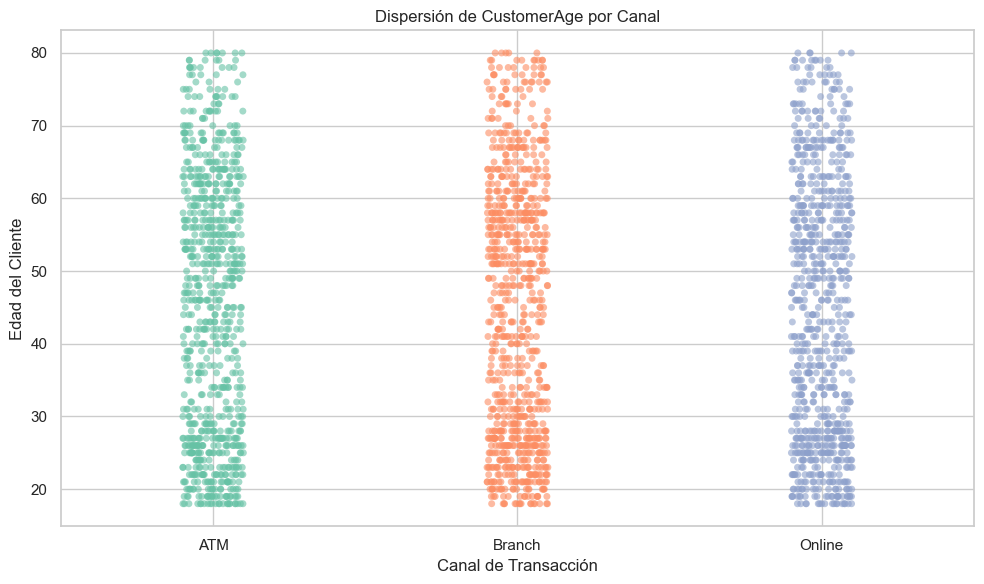

In [228]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='CustomerAge',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de CustomerAge por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Edad del Cliente')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

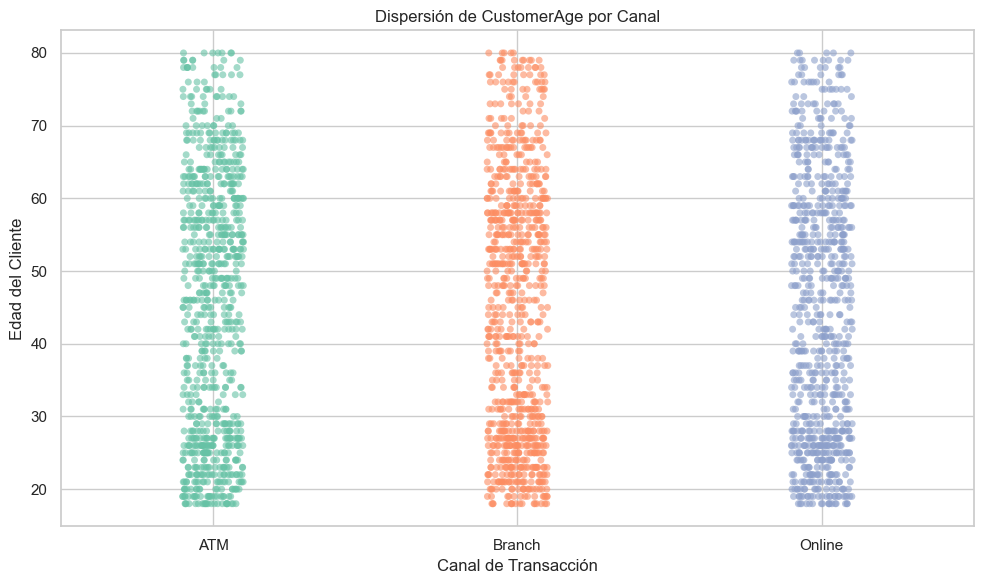

In [229]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='CustomerAge',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de CustomerAge por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Edad del Cliente')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

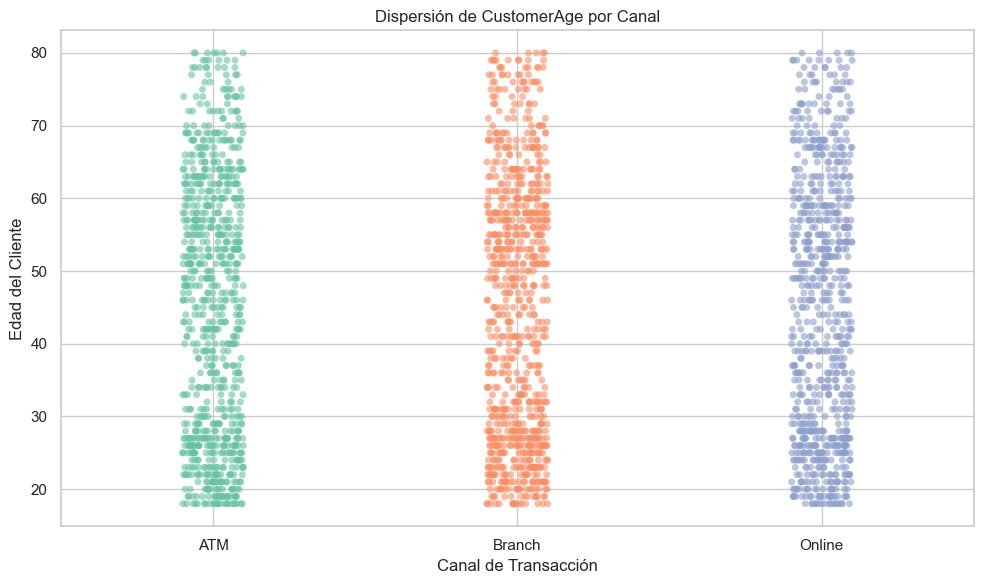

In [230]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='CustomerAge',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de CustomerAge por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Edad del Cliente')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

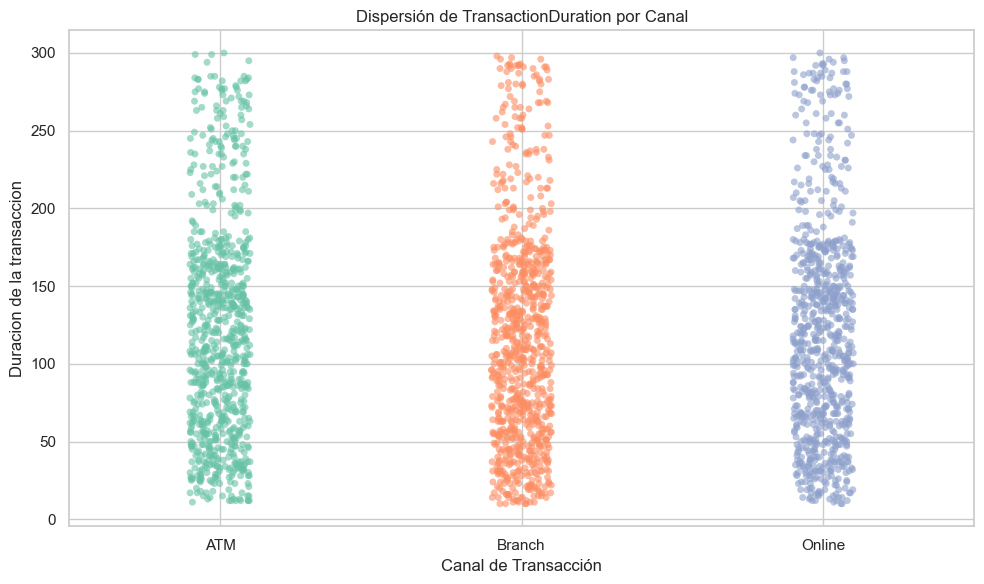

In [231]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='TransactionDuration',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de TransactionDuration por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Duracion de la transaccion')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

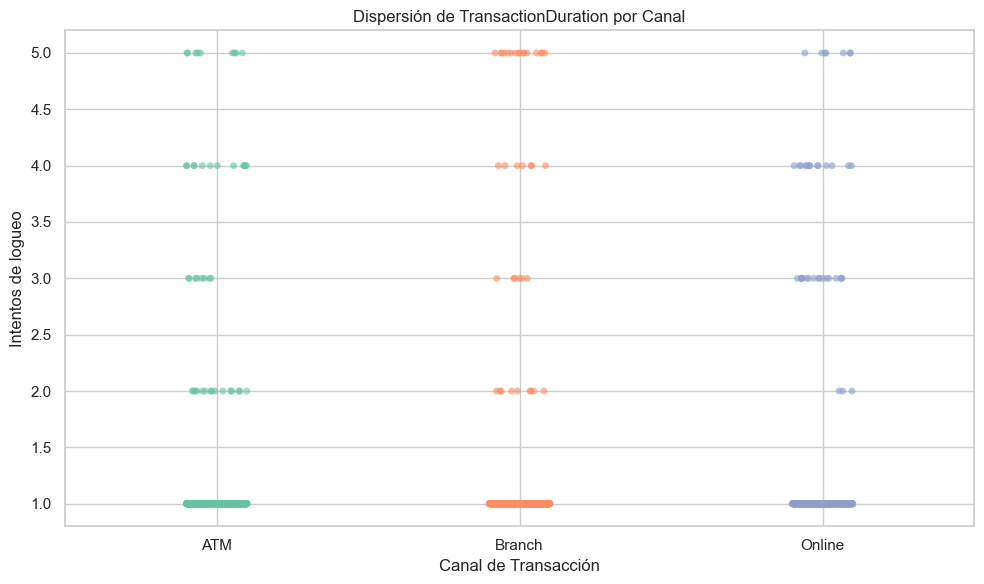

In [232]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='LoginAttempts',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de TransactionDuration por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Intentos de logueo')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

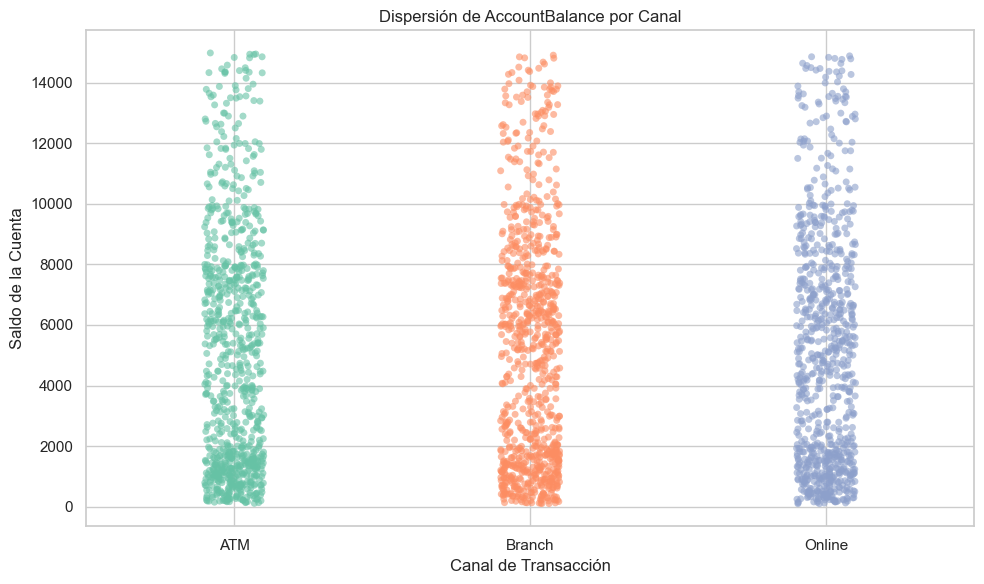

In [233]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Channel',
    y='AccountBalance',
    data=data,
    jitter=True,
    alpha=0.6,
    hue='Channel',
    palette='Set2',
    legend=False  # evita que se muestre una leyenda innecesaria
)

# Personalizar el gráfico
plt.title('Dispersión de AccountBalance por Canal')
plt.xlabel('Canal de Transacción')
plt.ylabel('Saldo de la Cuenta')
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

<Axes: xlabel='TransactionAmount', ylabel='Count'>

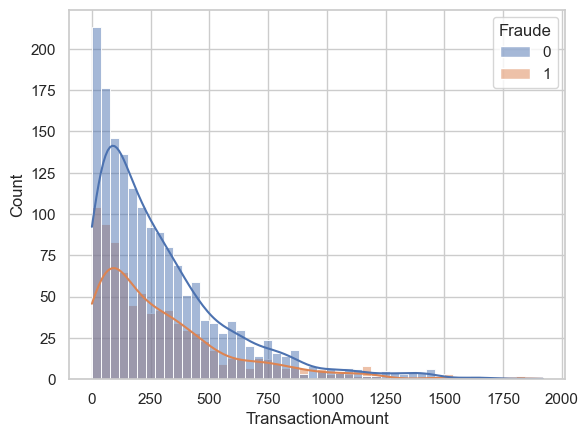

In [234]:
# DISTRIBUCION DE TransactionAmount
sns.histplot(data, x='TransactionAmount', hue='Fraude', kde=True, bins=50)

<Axes: xlabel='Channel', ylabel='Count'>

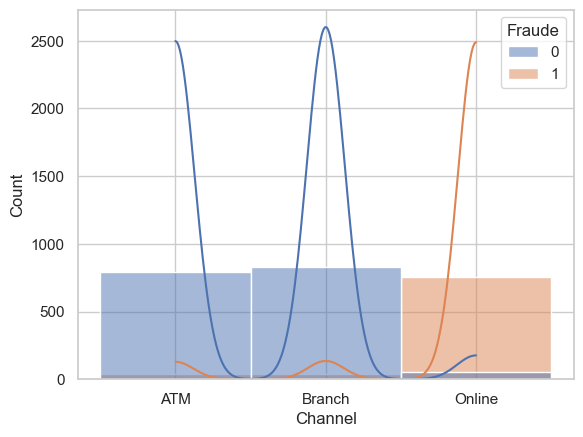

In [235]:
# DISTRIBUCION DE Channel
sns.histplot(data, x='Channel', hue='Fraude', kde=True, bins=50)

<Axes: xlabel='TransactionDuration', ylabel='Count'>

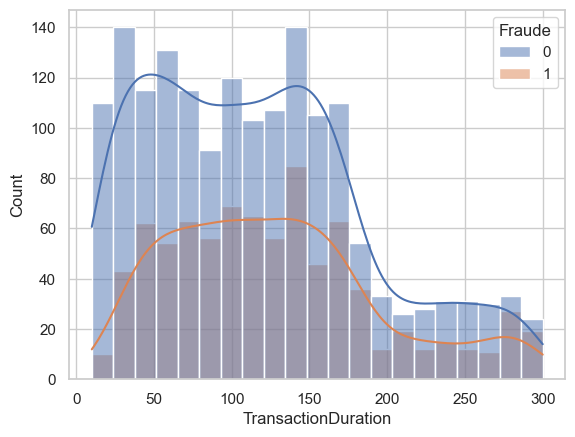

In [236]:
# DISTRIBUCION DE TransactionDuration
sns.histplot(data, x='TransactionDuration', hue='Fraude', kde=True)

<Axes: xlabel='CustomerAge', ylabel='Count'>

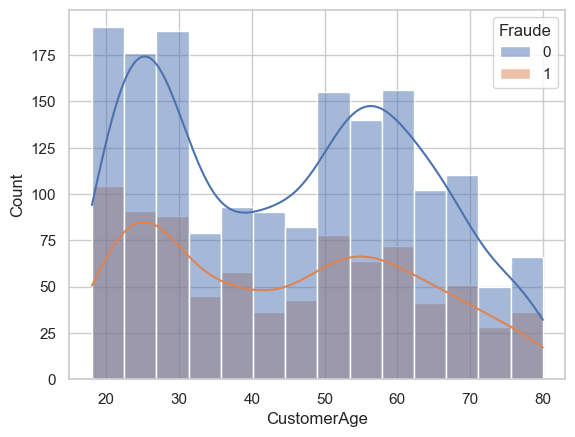

In [237]:
sns.histplot(data, x='CustomerAge', hue='Fraude', kde=True)

<Axes: xlabel='LoginAttempts', ylabel='count'>

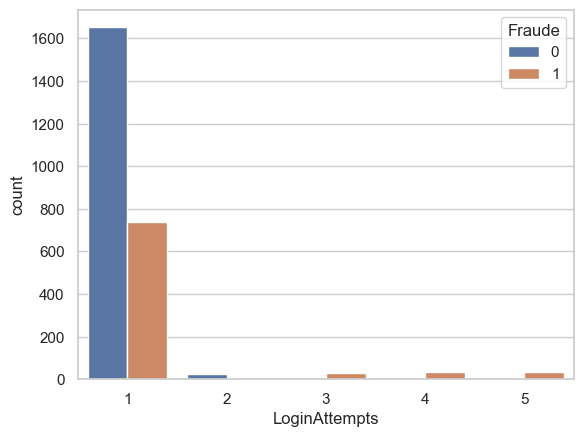

In [238]:
#Conteo de LoginAttempts
sns.countplot(data[data['LoginAttempts'] > 0], x='LoginAttempts', hue='Fraude')

<Axes: xlabel='IP Address', ylabel='Count'>

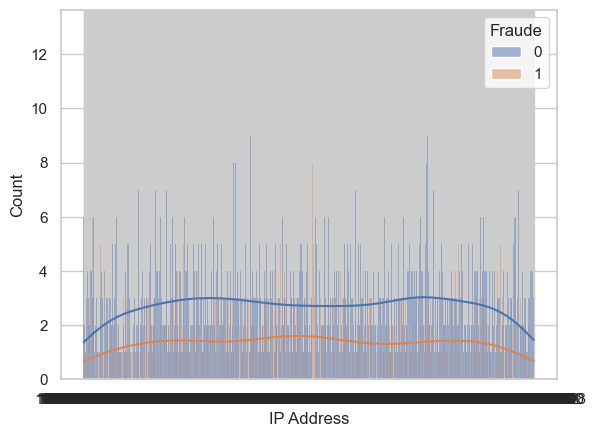

In [239]:
#Conteo de LoginAttempts
sns.histplot(data, x='IP Address', hue='Fraude', kde=True)

<Axes: xlabel='AccountBalance', ylabel='Count'>

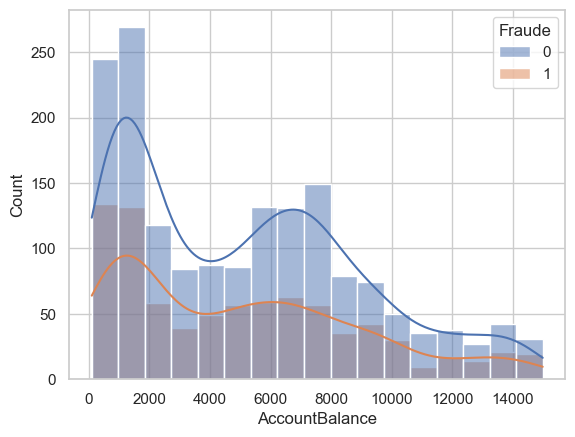

In [240]:
#Conteo de AccountBalance
sns.histplot(data, x='AccountBalance', hue='Fraude', kde=True)

In [241]:
# Filtramos por fraude = 1 o fraude = 0, según te interese
#Calcular IQR y límites de outliers

grupo_fraude = data[data['Fraude'] == 1]

# Calculamos cuartiles
Q1 = grupo_fraude['CustomerAge'].quantile(0.25)
Q3 = grupo_fraude['CustomerAge'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(grupo_fraude)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
10        TX000011   AC00150              17.78 2023-03-14 16:46:10   
11        TX000012   AC00459             190.02 2023-02-06 17:30:00   
...            ...       ...                ...                 ...   
2494      TX002495   AC00322             433.90 2023-03-10 17:38:58   
2496      TX002497   AC00432             307.68 2023-01-18 17:21:27   
2501      TX002502   AC00216             235.83 2023-09-01 16:26:50   
2504      TX002505   AC00047             123.38 2024-01-01 17:21:56   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType      Location DeviceID      IP Address MerchantID  \
2              Debit          Mesa  D000235  215.97.143.157       M009   

In [242]:
#Filtrar los outliers
# Identificar outliers (fuera del rango normal)
outliers = grupo_fraude[
    (grupo_fraude['CustomerAge'] < limite_inferior) |
    (grupo_fraude['CustomerAge'] > limite_superior)
]
#Ver los outliers
print(outliers[['CustomerAge', 'Fraude']])

Empty DataFrame
Columns: [CustomerAge, Fraude]
Index: []


In [243]:
# Resumen completo del DataFrame 'data'
resumen = pd.DataFrame({
    'Columna': data.columns,
    'Tipo de Dato': data.dtypes.values,
    'Valores Únicos': data.nunique().values,
    'Nulos': data.isnull().sum().values,
    'Ejemplo de Valor': [data[col].dropna().iloc[0] if data[col].notna().any() else None for col in data.columns],
    'Es Categórico': [str(data[col].dtype) == 'category' for col in data.columns],
    'Media (si aplica)': [data[col].mean() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns]
})

# Mostrar el resumen
print(resumen)

                    Columna    Tipo de Dato  Valores Únicos  Nulos  \
0             TransactionID          object            2512      0   
1                 AccountID          object             495      0   
2         TransactionAmount         float64            2455      0   
3           TransactionDate  datetime64[ns]            2512      0   
4           TransactionType        category               2      0   
5                  Location        category              43      0   
6                  DeviceID          object             681      0   
7                IP Address        category             592      0   
8                MerchantID          object             100      0   
9                   Channel        category               3      0   
10              CustomerAge           int64              63      0   
11       CustomerOccupation        category               4      0   
12      TransactionDuration           int64             288      0   
13            LoginA

In [244]:
# Ver estadísticas descriptivas (incluyendo datos categóricos)
print(data.describe(include='all'))

       TransactionID AccountID  TransactionAmount  \
count           2512      2512        2512.000000   
unique          2512       495                NaN   
top         TX002496   AC00460                NaN   
freq               1        12                NaN   
mean             NaN       NaN         297.593778   
min              NaN       NaN           0.260000   
25%              NaN       NaN          81.885000   
50%              NaN       NaN         211.140000   
75%              NaN       NaN         414.527500   
max              NaN       NaN        1919.110000   
std              NaN       NaN         291.946243   

                      TransactionDate TransactionType    Location DeviceID  \
count                            2512            2512        2512     2512   
unique                            NaN               2          43      681   
top                               NaN           Debit  Fort Worth  D000548   
freq                              NaN            19

In [245]:
print(data.columns.tolist())

['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Fraude']


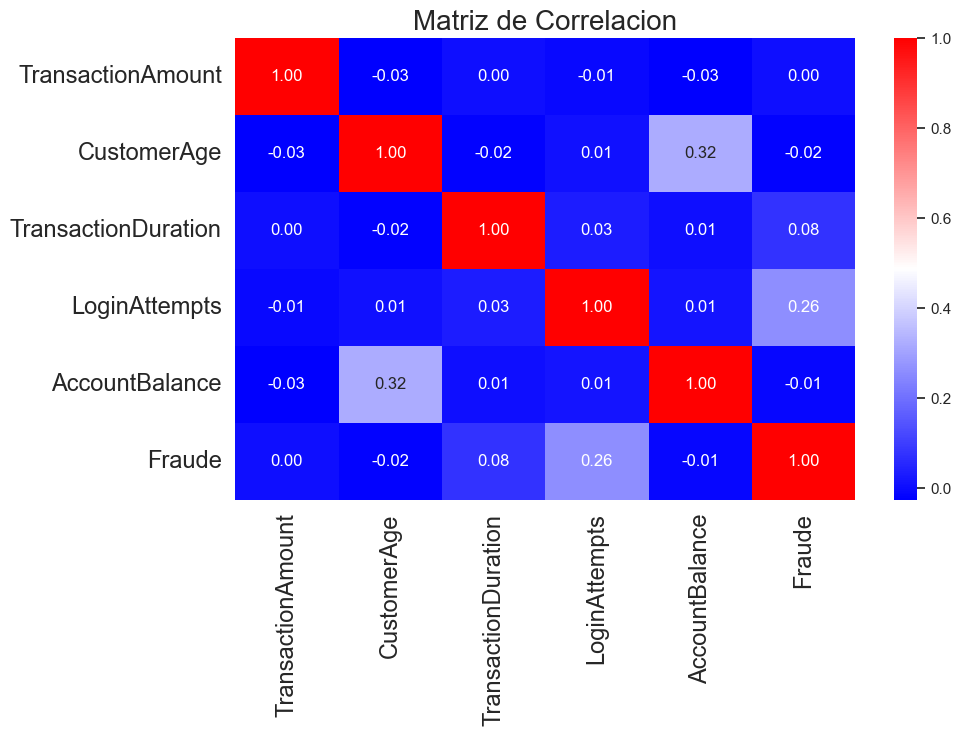

In [246]:
plt.figure(figsize=(10,6))

numeric_columns = data.select_dtypes(include=np.number).columns

correlation_matrix = data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt='.2f')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.title('Matriz de Correlacion', fontsize=20)
plt.show()

In [247]:
# 4: Aplicación de Algoritmos de Clasificación se compara dos algoritmos: Árbol de Decisión y Random Forest para predecir la variable objetivo IsFraud.
# 4.1 Dividir en variables predictoras y objetivo

# Definir X (predictoras) e y (objetivo)
X = data.drop('Fraude', axis=1)
y = data['Fraude']

# División de los datos en conjunto de entrenamiento y prueba (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X,y)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-04-11 16:29:14   
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92      

In [248]:
X_train.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [249]:
print(X_train.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                         category
DeviceID                           object
IP Address                       category
MerchantID                         object
Channel                          category
CustomerAge                         int64
CustomerOccupation               category
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


In [250]:
# Eliminar la columna 'TransactionID' que no es necesaria para el entrenamiento
X_train = X_train.drop(columns=['TransactionID'], errors='ignore')
X_test = X_test.drop(columns=['TransactionID'], errors='ignore')
X_train = X_train.drop(columns=['AccountID'], errors='ignore')
X_test = X_test.drop(columns=['AccountID'], errors='ignore')
X_train = X_train.drop(columns=['DeviceID'], errors='ignore')
X_test = X_test.drop(columns=['DeviceID'], errors='ignore')
X_train = X_train.drop(columns=['MerchantID'], errors='ignore')
X_test = X_test.drop(columns=['MerchantID'], errors='ignore')

In [251]:
X = data.drop(columns=["Fraude"])
y = data["Fraude"]

In [252]:
print(X.columns.tolist())

['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [253]:
print(X_train.shape)
print(y_train.shape)

(1758, 12)
(1758,)


In [254]:
#Verificar valores nulos en X_train y y_train

# Verificar valores nulos en X_train
print("Valores nulos en X_train:\n", X_train.isnull().sum())

# Verificar valores nulos en y_train
print("Valores nulos en y_train:\n", y_train.isnull().sum())

# Si hay valores nulos,  optar por eliminar o rellenarlos
X_train = X_train.dropna()  # Eliminar filas con valores nulos en X_train
y_train = y_train[X_train.index]  # Asegurarte de que y_train mantenga el mismo tamaño

# O puedes rellenar valores nulos con un valor específico, por ejemplo 0:
# X_train = X_train.fillna(0)  # Rellenar valores nulos con 0

Valores nulos en X_train:
 TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
IP Address                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Valores nulos en y_train:
 0


In [255]:
print(X_train.columns)

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate'],
      dtype='object')


Columnas categóricas disponibles para codificar: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
=== Arbol de decision ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.98      0.96      0.97       251

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98       754



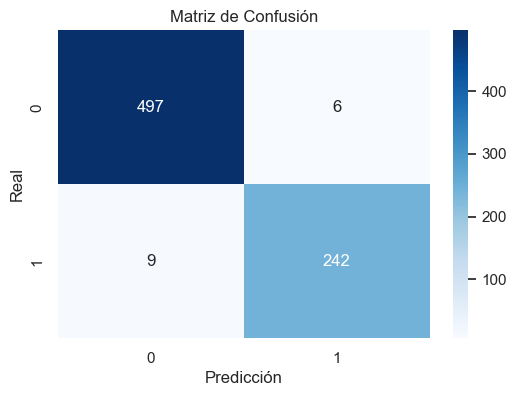

In [256]:
#4.2 Entrenar Árbol de Decisión
# Paso previo: Verificar qué columnas categóricas están realmente en X_train
categorical_columns_all = ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation']
available_categorical = [col for col in categorical_columns_all if col in X_train.columns]

print("Columnas categóricas disponibles para codificar:", available_categorical)

# Aplicar get_dummies solo a las columnas disponibles
X_train = pd.get_dummies(X_train, columns=available_categorical, drop_first=True)
X_test = pd.get_dummies(X_test, columns=available_categorical, drop_first=True)

# Alinear columnas entre train y test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Eliminar columnas datetime si hay
datetime_cols_train = X_train.select_dtypes(include='datetime64').columns
datetime_cols_test = X_test.select_dtypes(include='datetime64').columns
X_train = X_train.drop(columns=datetime_cols_train, errors='ignore')
X_test = X_test.drop(columns=datetime_cols_test, errors='ignore')

# Convertir las columnas que no son numéricas a tipo numérico
# Esto incluye convertir las columnas que contienen texto a valores numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicción
y_pred_dt = dt_model.predict(X_test)

# Resultados
print("=== Arbol de decision ===")
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

=== Bosque Aleatorio ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.97      0.98       251

    accuracy                           0.99       754
   macro avg       0.99      0.98      0.99       754
weighted avg       0.99      0.99      0.99       754



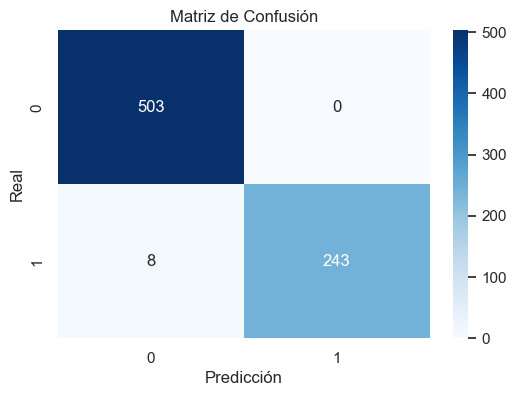

In [257]:
#4.3 Entrenar Random Forest
# Entrenar el modelo directamente (sin pipeline, porque ya está codificado)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("=== Bosque Aleatorio ===")
print(classification_report(y_test, y_pred_rf))  

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [259]:
#Realizar validación cruzada
#Finalmente, realizamos la validación cruzada con los modelos de clasificación (por ejemplo, Árboles de Decisión y Random Forest) para evaluar su rendimiento.

# Modelos
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Validación cruzada con 5 particiones (F1-score)
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)

# Promedio de F1-score
print("F1-score promedio - Árbol de Decisión:", cv_scores_dt.mean())
print("F1-score promedio - Bosque Aleatorio:", cv_scores_rf.mean())

F1-score promedio - Árbol de Decisión: 0.9749773374773374
F1-score promedio - Bosque Aleatorio: 0.9897662522662524
